In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
data = pd.read_csv("/content/Churn_Modelling.csv")

data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [6]:
# checking the percentage unique 

for col in data.columns :
    print(" col_name : " , col , " unique percentage : " , len(data[col].unique())/len(data))

 col_name :  RowNumber  unique percentage :  1.0
 col_name :  CustomerId  unique percentage :  1.0
 col_name :  Surname  unique percentage :  0.2932
 col_name :  CreditScore  unique percentage :  0.046
 col_name :  Geography  unique percentage :  0.0003
 col_name :  Gender  unique percentage :  0.0002
 col_name :  Age  unique percentage :  0.007
 col_name :  Tenure  unique percentage :  0.0011
 col_name :  Balance  unique percentage :  0.6382
 col_name :  NumOfProducts  unique percentage :  0.0004
 col_name :  HasCrCard  unique percentage :  0.0002
 col_name :  IsActiveMember  unique percentage :  0.0002
 col_name :  EstimatedSalary  unique percentage :  0.9999
 col_name :  Exited  unique percentage :  0.0002


In [7]:
# deleting RowNumber , CustomerId and Surname 

data = data.drop(["RowNumber" , "CustomerId" , "Surname"] , axis = 1)
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [8]:
# Label encode the Object Datatypes 
from sklearn.preprocessing import LabelEncoder

d_types = dict(data.dtypes)

for name , type_ in d_types.items():
    if str(type_) == 'object':
        Le = LabelEncoder()
        data[name] = Le.fit_transform(data[name])

In [9]:
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0


In [10]:
# one hot encode geography 
# optional 

from sklearn.preprocessing import OneHotEncoder

onehotencoder = OneHotEncoder()
encodings = onehotencoder.fit_transform(data['Geography'].values.reshape(-1,1)).toarray()

#values = dict(data["Geography"].value_counts())
values = data["Geography"].unique()

for val in values:
    data["Geography_" + str(val)] = encodings[:,val]

data = data.drop(["Geography"] , axis = 1)

data.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_0,Geography_2,Geography_1
0,619,0,42,2,0.00,1,1,1,101348.88,1,1.0,0.0,0.0
1,608,0,41,1,83807.86,1,0,1,112542.58,0,0.0,1.0,0.0
2,502,0,42,8,159660.80,3,1,0,113931.57,1,1.0,0.0,0.0
3,699,0,39,1,0.00,2,0,0,93826.63,0,1.0,0.0,0.0
4,850,0,43,2,125510.82,1,1,1,79084.10,0,0.0,1.0,0.0


In [11]:
remaining_columns = list(data.columns)
remaining_columns.remove("Exited")

In [12]:
# Feature and Target vector

X = data[remaining_columns].values 
Y = data['Exited'].values.astype(np.uint8)

In [13]:
from sklearn.model_selection import train_test_split

Xtrain , Xtest , Ytrain , Ytest = train_test_split(X , Y , test_size = 0.2 , random_state = 4)

In [14]:
from sklearn.preprocessing import StandardScaler

Scaler = StandardScaler()
Xtrain = Scaler.fit_transform(Xtrain)
Xtest = Scaler.transform(Xtest)

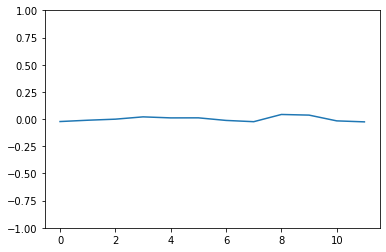

In [15]:
# check whether data is standardized or not 
# mean should be 1 

plt.ylim(-1,1)

means = []
for i in range(X.shape[1]):
    means.append(np.mean(Xtest[:,i]))
plt.plot(means , scaley=False)

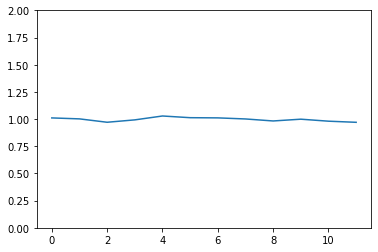

In [16]:
# Check variances 

plt.ylim(0,2)

vars = []
for i in range(X.shape[1]):
    vars.append(np.var(Xtest[:,i]))
plt.plot(vars)

In [17]:
from sklearn.linear_model import LogisticRegression 

model = LogisticRegression()
model.fit(Xtrain , Ytrain)

predictions = model.predict(Xtest)

Metrics

[[1549   55]
 [ 302   94]]


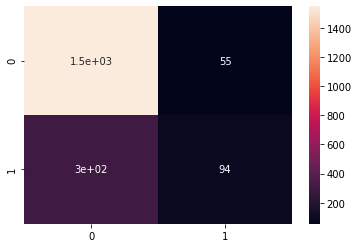

In [18]:
from sklearn.metrics import confusion_matrix,accuracy_score, precision_score, recall_score

matrix = confusion_matrix(Ytest , predictions)
print(matrix)
sns.heatmap(matrix , annot=True)

In [19]:
def Accuracy(Truths , Predictions):
    return np.mean(Truths == Predictions)

print("Validation Accuracy : " , Accuracy(Ytest , predictions))

Validation Accuracy :  0.8215


In [20]:
# Checking precision 

print("Precision : " , precision_score(Ytest , predictions))

Precision :  0.6308724832214765


In [21]:
# Checking recall 

print("Recall : " , recall_score(Ytest , predictions))

Recall :  0.23737373737373738


**Applying Class Weight**

In [22]:
# finding class weights 

value_counts = dict(data["Exited"].value_counts())
print(value_counts)

{0: 7963, 1: 2037}


In [23]:
class_weights = {0 : 20.37 , 1 : 79.63}

In [24]:
from sklearn.linear_model import LogisticRegression 

model = LogisticRegression(class_weight=class_weights)
model.fit(Xtrain , Ytrain)

predictions = model.predict(Xtest)

[[1128  476]
 [ 120  276]]


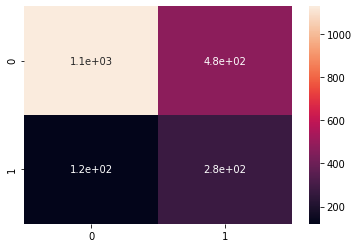

In [25]:
matrix = confusion_matrix(Ytest , predictions)
print(matrix)
sns.heatmap(matrix , annot=True)

In [26]:
def Accuracy(Truths , Predictions):
    return np.mean(Truths == Predictions)

print("Validation Accuracy : " , Accuracy(Ytest , predictions))

Validation Accuracy :  0.702


In [27]:
# Checking precision

print("Precision : " , precision_score(Ytest , predictions))

Precision :  0.3670212765957447


In [28]:
# Checking recall

print("Recall : " , recall_score(Ytest , predictions))

Recall :  0.696969696969697
